In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from scipy.integrate import odeint, solve_ivp
from scipy.special import erf
from math import sqrt
from scipy.ndimage.filters import laplace, convolve1d
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

In [101]:
def diff_adv(t, y, D, c, dx):
    dy = D / dx**2 * laplace(y) - c * np.gradient(y, dx)
    #  boundary conditions
    dy[0] = 2 * D/dx**2 * (y[1] - y[0] - c / D * y[0] * dx) - c**2 / D * y[0]
    dy[-1] = 2 * D/dx**2 * (y[-2] - y[-1] + c / D * dx * y[-1]) - c**2 / D * y[-1]
    return dy

In [102]:
D = 0.2
#test
v = 0.2
xmax = 10
x, dx = np.linspace(0, xmax, 401, retstep=True)
y0 = np.zeros_like(x)
y0[len(x)//2] = 1. / dx
tmax = 100
ts = np.linspace(0, tmax, 101)

In [103]:
sol = solve_ivp(diff_adv, (0, tmax), y0, t_eval=ts, args=(D, v, dx))

In [104]:
sol.message

'The solver successfully reached the end of the integration interval.'

In [105]:
yt = sol.y.T

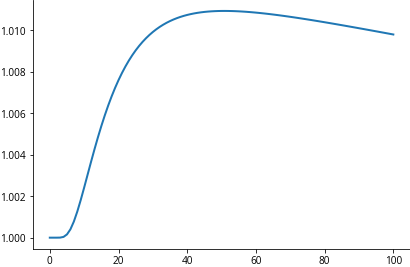

In [106]:
plt.plot(yt.sum(-1) * dx)

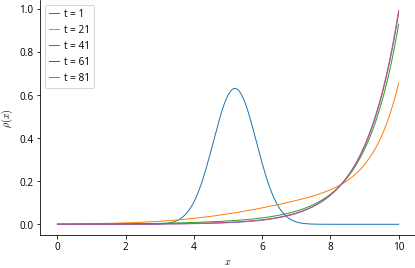

In [107]:
for t in np.linspace(1, len(ts), 5, dtype=int, endpoint=False):
    p = plt.plot(x, yt[t], label='t = {:n}'.format(ts[t]), lw=1)

#plt.plot(alpha, sol[-1], label='t = {:n}'.format(ts[-1]))
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.legend()

In [9]:
# geometry
geom = 'square'
restchannels = 1
l = 30
dims = l, l
# model parameters

r_d = 0.01
r_b = 0.2
kappa = -2
theta = 0.8

# simulation parameters
dens = 0.2 #starting condition
time = 100
nodes = np.zeros(dims+(5,), dtype=int)
nodes[l//2, l//2] = 1


lgca = get_lgca(interaction='go_or_grow', bc='periodic', density=dens, geometry=geom, dims=dims, restchannels=restchannels, ve=False, ib=True,
                r_d=r_d, r_b=r_b, kappa=kappa, theta=theta, nodes=nodes)

capacity of channel set to  8
std of kappa set to 0.2
std of theta set to 0.05


In [10]:
lgca.timeevo(time, record=True)

100%|██████████| 100/100 [00:05<00:00, 17.12it/s]


In [11]:
lgca.animate_density()

<IPython.core.display.Javascript object>

In [12]:
lgca.plot_prop_spatial()

<IPython.core.display.Javascript object>

(<Figure size 800x800 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f587a0f9640>)